# Quality Assesment Notebook

This notebook displays basic info and plots. 
It should run on your local computer, provided that you've 
download the \*-exp.fits and \*-exp.h5 files, but you can run
at jupyter.nersc.gov, once you've setup your 
environment (see below).

***WARNING:*** If you open a .h5 file (fit outputs) ***make sure you use the 'r' option***. Otherwise, you might overwrite the file and lose its contents. @TODO: add a protection againts this attack, for now ***please be careful.***

***Reminder***: your modifications will modify your local copy of the notebook, if you want to share those modifications, please do a PR. You might lose them if the notebook is modified and you update picca to the latest master. If you are unsure what this means, make a copy of the file (e.g. to your home) and work with it.

***How to setup the jupyter environment at NERSC***:
(you need to do this only once)

First, create a conda environment dedicated to picca plots:

    conda create -n picca_plots ipykernel fitsio h5py scipy matplotlib
    source activate picca_plots
    cd $HOME/igmhub/picca
    python setup.py install
    python -m ipykernel install --user --name picca_plots --display-name picca_plots
    source deactivate

Point your browser to jupyter.nersc.gov. After you login, you should see a `picca_plots` kernel. Double click on it. Navigate the left menu to open $HOME/igmhub/picca/tutorials/QA_plots.ipynb 

***notes:***

 * The setup.py install step will install picca only in your picca_plots environment and will not conflict with your previous installation, independently of whether you used PYTHONPATH or setup.py install (we need the setup.py install setp in the env because PYTHONPATH is not visible from the jupyter.nersc.gov).


In [1]:
import h5py
import fitsio
import os
from picca import wedgize
from matplotlib import pyplot as pp
import scipy as sp
import glob
%matplotlib inline
pp.rc('text',usetex=True)
os.chdir("/project/projectdirs/desi/mocks/lya_forest/picca/london/v4.0/quick-0.0/")

/global/homes/n/nbusca/.conda/envs/picca_plots/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


***INFO:*** you can safely ignore the error message in the cell above

The cell below will print out a table with the fit parameters for the auto results.
If you want the cross results instead change the first line to

    fi = sorted(glob.glob("xcf*.h5"))

In [2]:
fi=sorted(glob.glob("cf*.h5"))
ff = h5py.File(fi[0],'r')
cosmo_pars = ["bias_LYA","beta_LYA","bias_QSO","beta_QSO","ap","at"]
all_pars = [p.decode('utf-8') for p in ff['best fit'].attrs['list of free pars']]
bname0 = fi[0].replace(".h5","")
ff.close()

print("{:20}".format(""),end="")
for f in fi:
    print("{:^20}".format(f.replace("-exp.h5","")),end="")
print("")

for par in cosmo_pars:
    print("{:20}".format(par),end="")
    for f in fi:
        ff = h5py.File(f,'r')
        if par in ff['best fit'].attrs:
            p,dp = ff['best fit'].attrs[par]
            out = "{} +/- {}".format(round(p,3), round(dp,3))
            print("{:^20}".format(out),end="")
        ff.close()
    print("")
    
for par in all_pars:
    if par in cosmo_pars:
        continue
    print("{:20}".format(par[:20]),end="")
    for f in fi:
        ff = h5py.File(f)
        bname = f.replace(".h5","")
        pa = par.replace(bname0,bname)
        if pa in ff['best fit'].attrs:
            p,dp = ff['best fit'].attrs[pa]
            out = "{} +/- {}".format(round(p,3), round(dp,3))
            print("{:^20}".format(out),end="")
        ff.close()
    print("")
print("{:20}".format("chi2/(ndata-npar)"),end="")
for f in fi:
    ff = h5py.File(f,'r')
    chi2 = ff['best fit'].attrs['fval']
    ndata = ff['best fit'].attrs['ndata']
    npar = ff['best fit'].attrs['npar']
    out = "{}/({}-{})".format(round(chi2,1),ndata,npar)
    print("{:^20}".format(out),end="")
    ff.close()
print("")

                        cf_z_0_2.35        cf_z_2.35_2.65      cf_z_2.65_3.05       cf_z_3.05_10    
bias_LYA              -0.152 +/- 0.003    -0.14 +/- 0.002     -0.159 +/- 0.003    -0.154 +/- 0.005  
beta_LYA              1.464 +/- 0.045     1.165 +/- 0.022     1.281 +/- 0.037     1.141 +/- 0.065   
bias_QSO            
beta_QSO            
ap                    1.093 +/- 0.044     1.013 +/- 0.026     1.001 +/- 0.029     1.021 +/- 0.046   
at                     0.96 +/- 0.058     0.997 +/- 0.029     1.104 +/- 0.062      0.94 +/- 0.073   
par binsize cf_z_0_2  11.798 +/- 0.352     0.0 +/- 1.014      11.482 +/- 0.431   -12.852 +/- 0.801  
per binsize cf_z_0_2  10.935 +/- 0.493    8.584 +/- 0.686     11.057 +/- 0.548    10.712 +/- 0.984  
chi2/(ndata-npar)     1601.0/(1590-6)     1968.7/(1590-6)     1589.1/(1590-6)     1556.4/(1590-6)   


# Wedge plots

The cells below display wedge plots for a given file.

Change the value of `base` to the file you wish to display.

In [3]:
base = "cf_z_2.65_3.05-exp"
h = fitsio.FITS(base+".fits")
ff = h5py.File(base+".h5")
fit = ff[base+'/fit'][...]
da = h[1]["DA"][:]
co = h[1]["CO"][:]

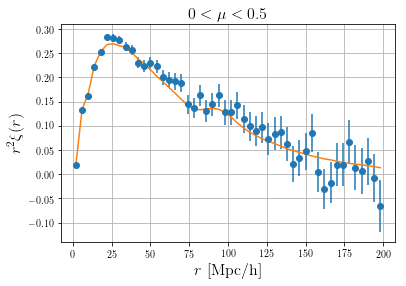

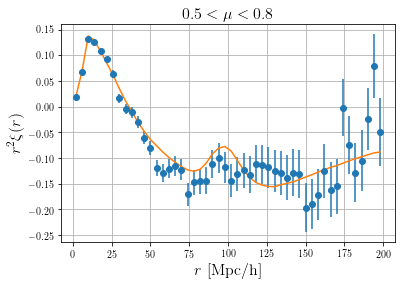

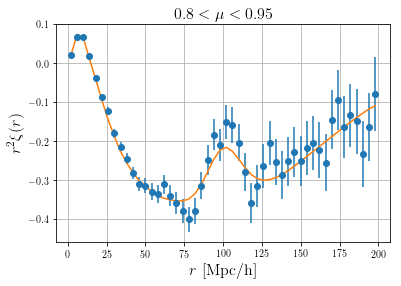

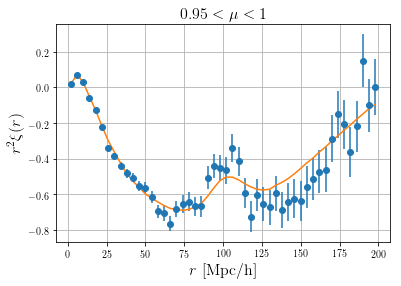

In [4]:
mus=[0,0.5,0.8,0.95,1]
rpmin = h[1].read_header()["RPMIN"]
np = h[1].read_header()["NP"]
for mumin,mumax in zip(mus[:-1],mus[1:]):
    b=wedgize.wedge(mumin=mumin,mumax=mumax,rpmin=rpmin,nrp=np,absoluteMu=True)
    r,d,c = b.wedge(da,co)
    r,f,_ = b.wedge(fit,co)
    pp.figure()
    pp.grid()
    pp.title(r"${}<\mu<{}$".format(mumin,mumax),fontsize=16)
    pp.ylabel(r"$r^2\xi(r)$",fontsize=16)
    pp.xlabel(r"$r~[\mathrm{Mpc/h}]$",fontsize=16)
    pp.errorbar(r,d*r**2,yerr=sp.sqrt(c.diagonal())*r**2,fmt="o")
    pp.plot(r,f*r**2)